# Анализ сервиса аренды самокатов GoFast

## Описание проекта

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки —  8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
### Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

- Пользователи — users_go.csv
    - user_id - уникальный идентификатор пользователя
    - name - имя пользователя
    - age -	возраст
    - city - город
    - subscription_type	- тип подписки (free, ultra)


- Поездки — rides_go.csv

    - user_id - уникальный идентификатор пользователя
    - distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
    - duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    - date - дата совершения поездки


- Подписки — subscriptions_go.csv
    - subscription_type - тип подписки
    - minute_price - стоимость одной минуты поездки по данной подписке
    - start_ride_price - стоимость начала поездки
    - subscription_fee - стоимость ежемесячного платежа
    
### Инструкция по выполнению проекта

#### Шаг 1. Загрузка данных
- Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
    - /datasets/users_go.csv
    - /datasets/rides_go.csv
    - /datasets/subscriptions_go.csv
- Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

#### Шаг 2. Предобработка данных
- Приведите столбец date к типу даты pandas.
- Создайте новый столбец с номером месяца на основе столбца date.
- Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

#### Шаг 3. Исследовательский анализ данных
Опишите и визуализируйте общую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

#### Шаг 4. Объединение данных
- Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
- Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
    - c данными о пользователях без подписки;
    - с данными о пользователях с подпиской.
- Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

#### Шаг 5. Подсчёт выручки
- Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

#### Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

### Написать общий вывод

## Загрузка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# прочитаем файлы и сохраним их в переменные
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'], dayfirst=True)
subs_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
# создадим функцию для быстрого просмотра всей нужной информации датафреймов
def display_and_info(df):
    display(df.head())
    display(df.info())
    display(df.describe().T)

### Изучаем датафрейм c пользователями

In [4]:
# посмотрим на датафрейм 'users_go'
display_and_info(users_go)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,count,mean,std,min,25%,50%,75%,max
user_id,1565.0,762.633866,443.260155,1.0,378.0,762.0,1146.0,1534.0
age,1565.0,24.922045,4.553496,12.0,22.0,25.0,28.0,43.0


В датафрейме с пользователями все столбцы имеют "змеиный" стиль. В каждом столбце имеются все данные без пропусков. Типы данных всех столбцов соответствуют своему типу данных.

### Изучаем датафрейм с поездками

In [5]:
# посмотрим на датафрейм 'rides_go'
display_and_info(rides_go)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

,count,mean,std,min,25%,50%,75%,max
user_id,18068.0,842.869936,434.734317,1.000000,487.000000,889.000000,1213.250000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,2543.226360,3133.609994,3776.222735,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,13.597563,17.678395,21.724800,40.823963


В датафрейме с поездками все столбцы имеют "змеиный" стиль. В каждом столбце имеются все данные без пропусков. Типы данных всех столбцов соответствуют своему типу данных.

### Изучаем датафрейм с подписками

In [6]:
# посмотрим на датафрейм 'subs_go'
display_and_info(subs_go)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,count,mean,std,min,25%,50%,75%,max
minute_price,2.0,7.0,1.414214,6.0,6.50,7.0,7.50,8.0
start_ride_price,2.0,25.0,35.355339,0.0,12.50,25.0,37.50,50.0
subscription_fee,2.0,99.5,140.714249,0.0,49.75,99.5,149.25,199.0


В датафрейме с подписками все столбцы имеют "змеиный" стиль. В каждом столбце имеются все данные без пропусков. Типы данных всех столбцов соответствуют своему типу данных.

Вывод:
- Загрузили и изучили наши таблицы.
- Ознакомились с общей информацией и вывели первые строки каждой таблицы.
- Во всех датафреймах соблюдён "змеиный" стиль.
- Датафреймы не имеют пропусков и типы данных соответствуют своим типам данных.

## Предобработка данных

### Посмотрим на количество пропусков в таблицах

In [7]:
# посмотрим на пропуски в таблице с пользователями
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [8]:
# посмотрим на пропуски в таблице с поездками
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [9]:
# посмотрим на пропуски в таблице с подписками
subs_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Создадим новый столбец с номером месяца на основе столбца 'date'

In [10]:
# сначала проверим за какой год представлены данные
rides_go['date'].dt.year.unique()

array([2021])

In [11]:
# данные представлены только за один год, значит месяца не продублируются за разные года
rides_go['month'] = rides_go['date'].dt.month
# посмотрим первые 10 строк нового столбца
rides_go['month'].head(10)

0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int64

### Проверим на наличие дубликатов

In [12]:
# посмотрим на пропуски в таблице с пользователями
users_go.duplicated().sum()

31

In [13]:
# удаляем дубликаты
users_go.drop_duplicates(inplace=True)

In [14]:
# проверяем еще раз на наличие пропусков в таблице с пользователями
users_go.duplicated().sum()

0

In [15]:
# посмотрим на пропуски в таблице с поездками
rides_go.duplicated().sum()

0

In [16]:
# посмотрим на пропуски в таблице с подписками
rides_go.duplicated().sum()

0

Вывод:
- Пропусков нет
- Добавили новый столбец с номером месяца
- Дубликаты были только в таблице 'user_go', их удалили. Теперь дубликатов нет

## Исследовательский анализ данных

### Посмотрим на частоту встречаемости городов

In [17]:
# создадим переменную для подсчета количества пользователей из каждого города
count_users = users_go['city'].value_counts()
count_users

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [18]:
# создадим переменную для подсчёта доли каждого города от общего числа пользователей в %
fraction = count_users / count_users.sum() * 100
fraction

Пятигорск         14.276402
Екатеринбург      13.298566
Ростов-на-Дону    12.907432
Краснодар         12.581486
Сочи              12.320730
Омск              11.929596
Тюмень            11.734029
Москва            10.951760
Name: city, dtype: float64

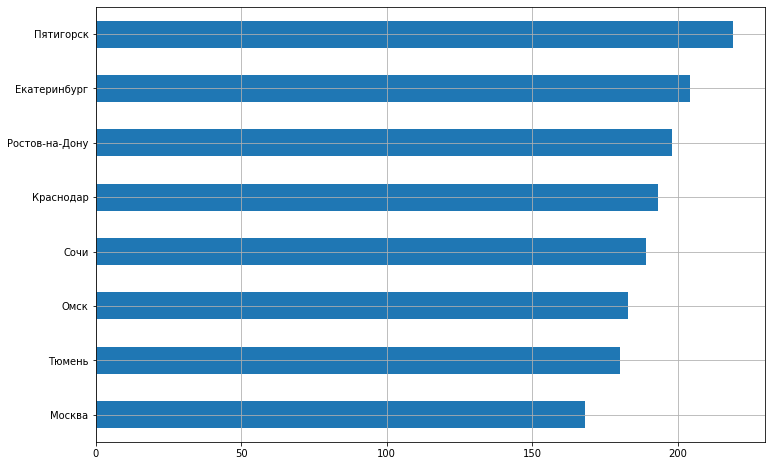

In [19]:
# построим график количества пользователей по городам
count_users.sort_values().plot(y='city', kind='barh', figsize=(12, 8), grid=True);

### Изучим соотношение пользователей с подпиской и без подписки

In [20]:
# создадим переменную для просмотра количества пользователей с подпиской и без
count_subs = users_go['subscription_type'].value_counts()
count_subs

free     835
ultra    699
Name: subscription_type, dtype: int64

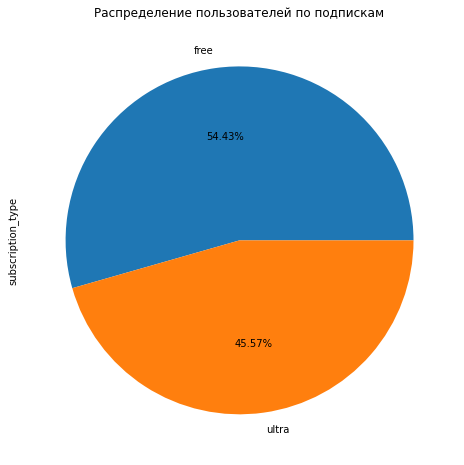

In [21]:
# посмотрим на процентное соотношение польвателей с подпиской и без
users_go['subscription_type'].value_counts().plot(
    kind = 'pie',
    y = count_users,
    autopct = '%1.2f%%',
    figsize=(8,8), 
    title = 'Распределение пользователей по подпискам');

### Изучим возраст пользователей

In [22]:
# посмотрим на числовое описание данных по возрасту пользователей
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

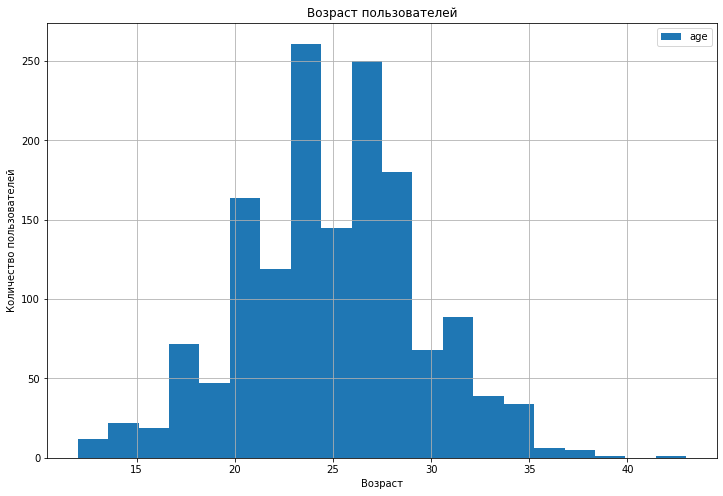

In [23]:
# построим гистограмму по столбцу 'age'
users_go['age'].plot(y='age', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

### Посмотрим на расстояние, которое пользователь преодолел за одну поездку

In [24]:
# посмотрим на числовое описание данных по поездкам
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

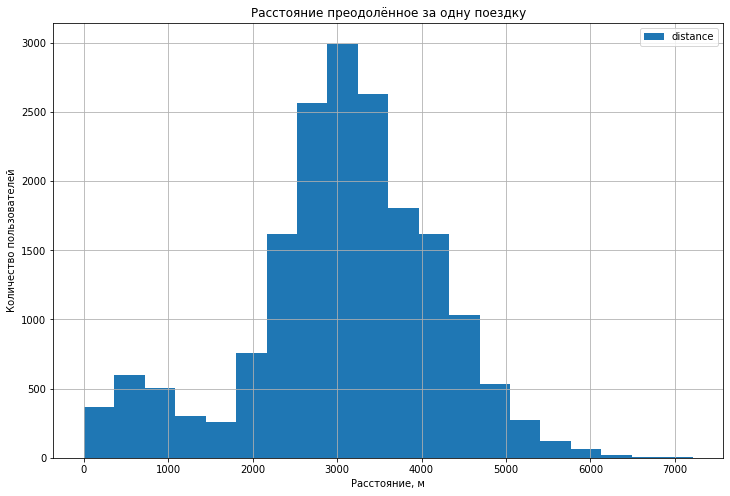

In [25]:
# построим гистограмму по столбцу 'distance'
rides_go['distance'].plot(y='distance', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Расстояние преодолённое за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

Здесь мы видим небольшой пик на расстоянии до 1 км. Тут скорее всего пользователи просто добираются более быстрым способом допустим до места учёбы, работы или пересаживаются уже на общественный транспорт. В общем от дома до остановки, до метро или же наоборот. Такая короткая дистанция явна не прогулки на самокате, а экономия времени. Конечно тут уже очень скорее такие пользователи оформили подписку чтобы не платить каждый раз за старт, но всё бывает

### Изучим продолжительность поездок

In [26]:
# посмотрим на числовое описание данных по продолжительности поездки
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

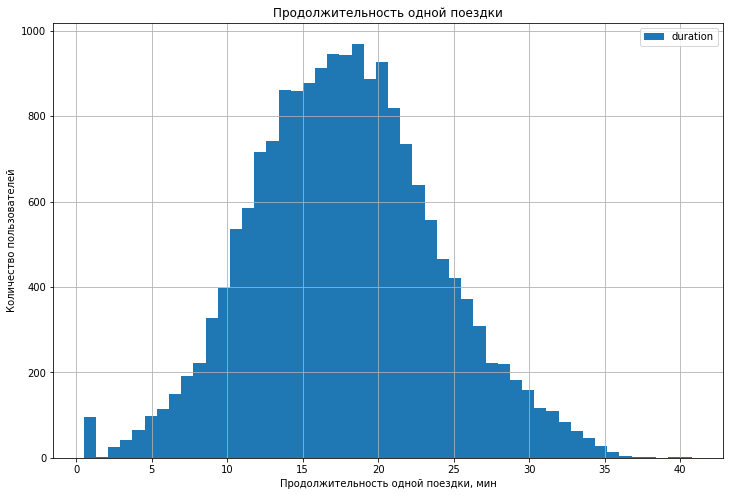

In [27]:
# построим гистограмму по столбцу 'duration'
rides_go['duration'].plot(y='duration', kind='hist', bins=50, figsize=(12, 8), grid=True, legend=True)
plt.title('Продолжительность одной поездки')
plt.xlabel('Продолжительность одной поездки, мин')
plt.ylabel('Количество пользователей')
plt.show()

Пик возле 0 минут скорее всего связан со взятием самоката в аренду, а уже после прям обнаружение какой-либо неисправности в самокате. Естественно окончание аренды и отсюда 0 минут.

### Вывод по исследовательскому анализу

- Частота встречаемости городов

Пользователи распределены почти равномерно. Больше всего в Пятигорске - 219 пользователей (14,27%), а меньше всего в Москве - 168 (10,95%)
  
- Соотношение пользователей с подпиской и без подписки

Пользователей без подписки немного больше - 835 (54,43%), а с подпиской - 699 (45,57%)

- Возраст пользователей

Основной возраст пользователей которые пользуются приложением от 20 до 29 лет.
Самый младший возраст - 12 лет, а самый старший - 43 года.

- Расстояние которое пользователь преодолел за одну поездку

В среднем пользователи проезжают от 2100 до 4300 метров.
Самая короткая поездка была меньше 1 метра - 0,85 метра, что очень странно. Скорее всего неисправность самоката.
Самая длинная поездка больше 7 км - 7211 метров.

- Продолжительность поездок

В среднем у пользователей продолжительность поездки составляет от 10 до 24 минут.
Самая короткая поездка по времени была полминуты, что очень странно. Скорее всего также из-за неисправности самоката.
Самая продолжительная поездка был почти 41 минуту - 40,82 минуты (если перевести правильно в минуты и секунды, то выйдет 40 минут и 49 секунд).

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [28]:
# для начала объединим данные о пользователях и поездках
df = users_go.merge(rides_go, how='inner')

In [29]:
# теперь объединим новый датафрейм с данными о подписках
df = df.merge(subs_go, how='inner')

In [30]:
# посмотрим на новый датафрейм
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [31]:
# проверим количество строк датафрейма о поездках и сравним с количеством строк нового объединённого датафрейма
display(len(rides_go))
display(len(df))

18068

18068

In [32]:
# округлим значения столбца 'duration' c помощью метода "потолок"
df['duration'] = np.ceil(df['duration'])

### Создадим новый датафрейм о пользователях без подписки

In [33]:
# создадим новую переменную куда войдут данные только пользователей без подписки из нового датафрейма
df_subs_free = df.query("subscription_type == 'free'")
df_subs_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [34]:
# посмотрим на числовое описание данных датафрейма пользователей без подписки
df_subs_free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.890992,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.330250,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,1.000000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,13.000000,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,18.000000,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,22.000000,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,35.000000,12.000000,8.0,50.0,0.0


Визуализируем информацию о расстоянии и времени поездок для пользователей без подписки

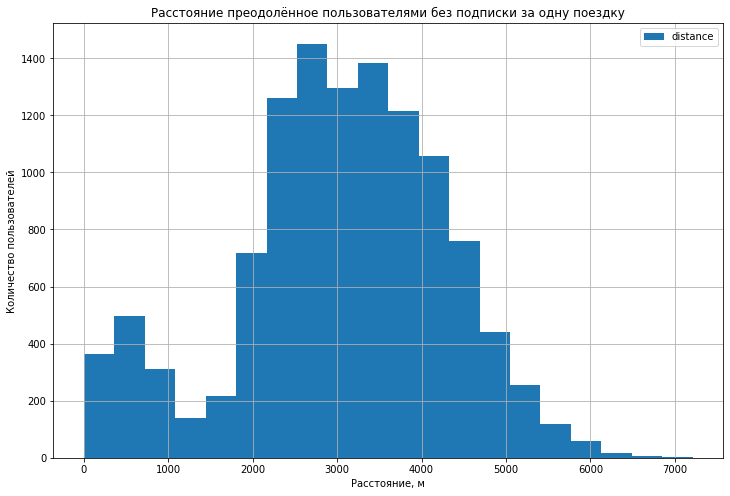

In [35]:
# построим гистограмму о преодолённом расстоянии для пользователей без подписки
df_subs_free['distance'].plot(y='distance', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Расстояние преодолённое пользователями без подписки за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

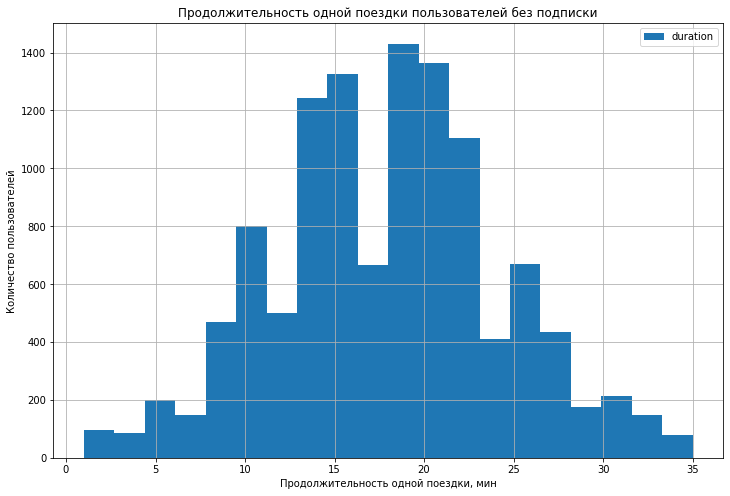

In [36]:
# построим гистограмму о продолжительности поездки для пользователей без подписки
df_subs_free['duration'].plot(y='duration', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Продолжительность одной поездки пользователей без подписки')
plt.xlabel('Продолжительность одной поездки, мин')
plt.ylabel('Количество пользователей')
plt.show()

### Создадим новый датафрейм о пользователях с подпиской

In [37]:
# создадим новую переменную куда войдут данные только пользователей с подпиской из нового датафрейма
df_subs_ultra = df.query("subscription_type == 'ultra'")
df_subs_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,16.0,2021-10-17,10,6,0,199


In [38]:
# посмотрим на числовое описание данных датафрейма пользователей с подпиской
df_subs_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,19.037692,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.577439,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,4.000000,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,15.000000,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,19.000000,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,22.000000,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,41.000000,12.000000,6.0,0.0,199.0


Визуализируем информацию о расстоянии и времени поездок для пользователей с подпиской

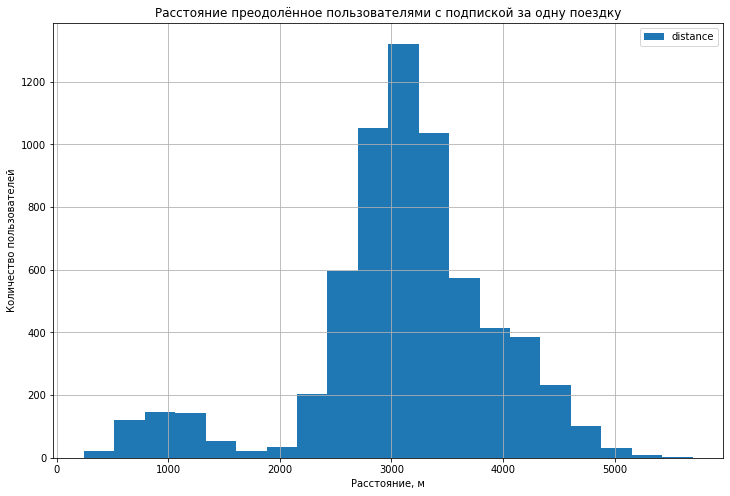

In [39]:
# построим гистограмму о преодолённом расстоянии для пользователей с подпиской
df_subs_ultra['distance'].plot(y='distance', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Расстояние преодолённое пользователями с подпиской за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

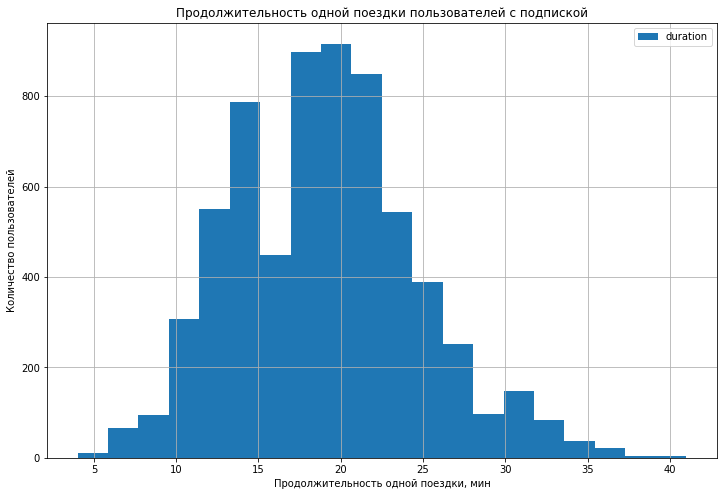

In [40]:
# построим гистограмму о продолжительности поездки для пользователей с подпиской
df_subs_ultra['duration'].plot(y='duration', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Продолжительность одной поездки пользователей с подпиской')
plt.xlabel('Продолжительность одной поездки, мин')
plt.ylabel('Количество пользователей')
plt.show()

### Сравним гистограммы о расстоянии и времени поездок для пользователей с подпиской и без подписки

In [41]:
# переименуем наименования столбцов для корректного отображения на общей гистограмме
df_subs_free = df_subs_free.rename(columns={'distance': 'distance_free', 'duration': 'duration_free'})
df_subs_ultra = df_subs_ultra.rename(columns={'distance': 'distance_ultra', 'duration': 'duration_ultra'})

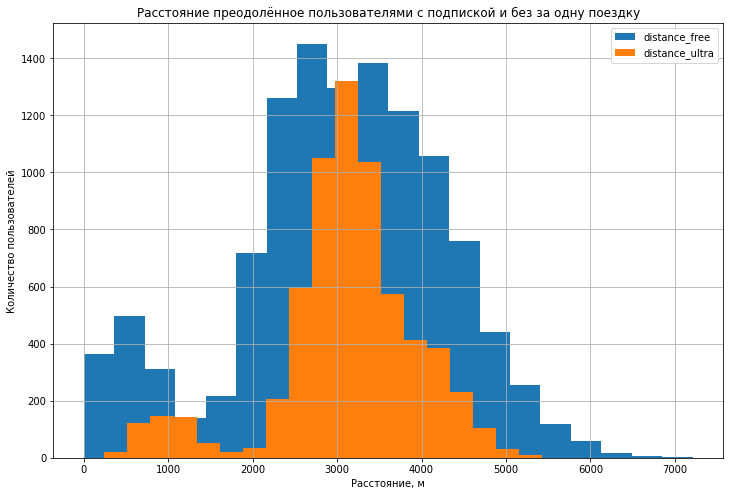

In [42]:
# сравним гистограммы преодолённого расстояния за одну поездку пользователя без подписки и с подпиской
df_subs_free['distance_free'].plot(y='distance', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
df_subs_ultra['distance_ultra'].plot(y='distance', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Расстояние преодолённое пользователями с подпиской и без за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

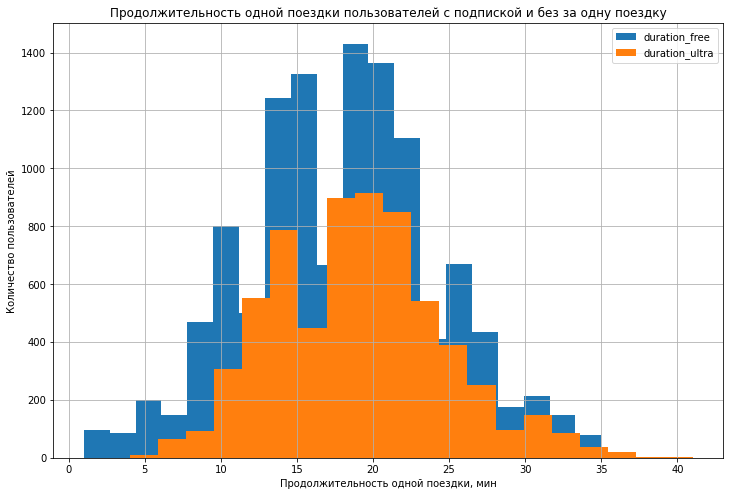

In [43]:
# сравним гистограммы продолжительности одной поездки пользователей без подписки и с подпиской
df_subs_free['duration_free'].plot(y='duration', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
df_subs_ultra['duration_ultra'].plot(y='duration', kind='hist', bins=20, figsize=(12, 8), grid=True, legend=True)
plt.title('Продолжительность одной поездки пользователей с подпиской и без за одну поездку')
plt.xlabel('Продолжительность одной поездки, мин')
plt.ylabel('Количество пользователей')
plt.show()

Вывод

- Объединили все 3 датафрейма в один
- Создали 2 новых датафрейма из объеденённого:
    - пользователей без подписки ('df_subs_free')
    - пользователей с подпиской ('df_subs_ultra')
- Визуализировали преодолённое расстояние и продолжительность одной поездки для пользователей без подписки.

Пользователи без подписки в основном проезжают от 1,9 км до 4,7 км за одну поездку, затрачивая при этом от 9 до 25 минут.

- Визуализировали преодолённое расстояние и продолжительность одной поездки для пользователей с подпиской.

Пользователи с подпиской в основном проезжают от 2,4 км до 4,8 км за одну поездку, затрачивая при этом от 11 до 24 минут.

В целом данные по визуализации примерно одинаковые также как и возраст (самые младшие имеют возраст по 12 лет, а самые старшие 38 лет с подпиской и 43 года без подписки).
Причём поездок пользователей без подписки гораздо больше поездок пользователей с подпиской (11568 и 6500 соответственно)

## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездах на основе датафрейма 'df'

In [44]:
# создадим переменную с данными по каждому пользователю за каждый месяц
users_go_month = df.pivot_table(
    index= ('month', 'user_id'),
    values = ('distance', 'duration', 'name', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'),
    aggfunc = {'distance': sum, 'duration': sum, 'name': len,
               'subscription_type': min, 'minute_price': min, 'start_ride_price': min, 'subscription_fee': min})
# посмотрим на новую таблицу
users_go_month

distance  duration  minute_price  name  start_ride_price  \
month user_id                                                                
1     1        7027.511294      42.0             6     2                 0   
      3        3061.777147      13.0             6     1                 0   
      5        3914.646990      13.0             6     1                 0   
      7        6478.080979      28.0             6     2                 0   
      12       3577.151148      33.0             6     1                 0   
...                    ...       ...           ...   ...               ...   
12    1525     4597.854350      34.0             8     1                50   
      1526     3644.121544      23.0             8     1                50   
      1528     3998.569324      11.0             8     1                50   
      1532     6111.889853      42.0             8     2                50   
      1534     2371.711192      16.0             8     1                50   

               subscription_fee subscription_type  
month user_id                                      
1     1                     199             ultra  
      3                     199             ultra  
      5                     199             ultra  
      7                     199             ultra  
      12                    199             ultra  
...                         ...               ...  
12    1525                    0              free  
      1526                    0              free  
      1528                    0              free  
      1532                    0              free  
      1534                    0              free  

[11331 rows x 7 columns]

In [45]:
# переименуем столбец 'name' в 'count_month' (количество поездок за месяц)
users_go_month.rename(columns = {'name' : 'count_month'}, inplace=True)
# посмотрим на первые 10 строк новой таблицы
users_go_month.head(10)

distance  duration  minute_price  count_month  \
month user_id                                                     
1     1        7027.511294      42.0             6            2   
      3        3061.777147      13.0             6            1   
      5        3914.646990      13.0             6            1   
      7        6478.080979      28.0             6            2   
      12       3577.151148      33.0             6            1   
      13       6687.987446      42.0             6            2   
      14       7699.643820      35.0             6            2   
      15       4187.621459      39.0             6            1   
      20       3516.719208      29.0             6            1   
      22       3058.692225      13.0             6            1   

               start_ride_price  subscription_fee subscription_type  
month user_id                                                        
1     1                       0               199             ultra  
      3                       0               199             ultra  
      5                       0               199             ultra  
      7                       0               199             ultra  
      12                      0               199             ultra  
      13                      0               199             ultra  
      14                      0               199             ultra  
      15                      0               199             ultra  
      20                      0               199             ultra  
      22                      0               199             ultra

### Создадим новый столбец с помесячной выручкой, которую принёс каждый пользователь

In [46]:
# создадим новый столбец с помесячной выручкой
users_go_month['revenue_month'] = (
(users_go_month['minute_price'] * users_go_month['duration']) + 
(users_go_month['count_month'] * users_go_month['start_ride_price']) + users_go_month['subscription_fee'])

In [47]:
# посмотрим на наш датафрейм с добавлением нового столбца
users_go_month.head()

distance  duration  minute_price  count_month  \
month user_id                                                     
1     1        7027.511294      42.0             6            2   
      3        3061.777147      13.0             6            1   
      5        3914.646990      13.0             6            1   
      7        6478.080979      28.0             6            2   
      12       3577.151148      33.0             6            1   

               start_ride_price  subscription_fee subscription_type  \
month user_id                                                         
1     1                       0               199             ultra   
      3                       0               199             ultra   
      5                       0               199             ultra   
      7                       0               199             ultra   
      12                      0               199             ultra   

               revenue_month  
month user_id                 
1     1                451.0  
      3                277.0  
      5                277.0  
      7                367.0  
      12               397.0

In [48]:
# посмотрим также датафрейм не по месяцам, а по пользователям
users_go_month.query('user_id == 1')

,,distance,duration,minute_price,count_month,start_ride_price,subscription_fee,subscription_type,revenue_month
month,user_id,,,,,,,,
1,1,7027.511294,42.0,6,2,0,199,ultra,451.0
4,1,754.159807,7.0,6,1,0,199,ultra,241.0
8,1,6723.470560,46.0,6,2,0,199,ultra,475.0
10,1,5809.911100,32.0,6,2,0,199,ultra,391.0
11,1,7003.499363,56.0,6,3,0,199,ultra,535.0
12,1,6751.629942,28.0,6,2,0,199,ultra,367.0


Вывод

- Создали новый датафрейм с агрегированными данными о поездках
- Нашли суммарное расстояние, количество поездок и суммарное время по каждому пользователю по месяцам
- Добавили новый столбец с помесячной выручкой по каждому пользователю

## Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу.

H_0: Время пользователей с подпиской = время пользователей без подписки ('duration' пользователей 'ultra' = 'duration' пользователей 'free')

H_1: 'duration' пользователей 'ultra' > 'duration' пользователей 'free'

alpha = 0.05

In [49]:
# проверим нулевую гипотезу
ultra = df_subs_ultra['duration_ultra']
free = df_subs_free['duration_free']

results = st.ttest_ind(ultra, free, alternative='greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    
    
print('В среднем пользователи с подпиской тратят', ultra.mean().round(1), 'минут')
print('В среднем пользователи без подписки тратят', free.mean().round(1), 'минут')

2.4959453720736625e-34
Отвергаем нулевую гипотезу
В среднем пользователи с подпиской тратят 19.0 минут
В среднем пользователи без подписки тратят 17.9 минут


Вывод: Проверили нулевую гипотезу и отвергли её, т.к. пользователи с подпиской больше тратят времени на поездки чем пользователи без подписки

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Проверим гипотезу.

H_0: Расстояние пользователей с подпиской за одну поездку = 3130 метров ('distance' пользователей 'ultra' за одну поездку = 3130 метров.

H_1: 'distance' пользователей 'ultra' > 3130 метров

alpha = 0.05

In [50]:
# проверим нулевую гипотезу
ultra_dist = df_subs_ultra['distance_ultra']
interested_value = 3130

results = st.ttest_1samp(ultra_dist, interested_value, alternative='greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    
print('В среднем пользователи с подпиской проезжают', ultra_dist.mean().round(1), 'метров за одну поездку')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу
В среднем пользователи с подпиской проезжают 3115.4 метров за одну поездку


Вывод: Проверили нулевую гипотезу, и не смогли её отвергнуть, т.к. среднее расстояние пользователей с подпиской за одну поездку меньше 3130 метров.

### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

H_0: Помесячная выручка пользователей с подпиской = помесячная выручка пользователей без подписки ('revenue_month' пользователей 'ultra' = 'revenue_month' пользователей 'free')

H_1:c 'revenue_month' пользователей 'ultra' > 'revenue_month' пользователей 'free'

alpha = 0.05

In [51]:
# проверим нулевую гипотезу
ultra_month = users_go_month.loc[users_go_month.subscription_type == 'ultra', 'revenue_month']
free_month = users_go_month.loc[users_go_month.subscription_type == 'free', 'revenue_month']

results = st.ttest_ind(ultra_month, free_month, alternative='greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    
print('В среднем помесячная выручка пользователей с подпиской составляет', ultra_month.mean().round(1), 'рублей')
print('В среднем помесячная выручка пользователей без подписки составляет', free_month.mean().round(1), 'рублей')

1.8850394384715216e-31
Отвергаем нулевую гипотезу
В среднем помесячная выручка пользователей с подпиской составляет 362.8 рублей
В среднем помесячная выручка пользователей без подписки составляет 328.6 рублей


Вывод: Проверили нулевую гипотезу, и отвергли её, т.к. помесячная выручка пользователей с подпиской больше чем помесячная выручка пользователей без подписки

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Тут необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок, т.к. рассматривается один и тот же файл до обновления и после него.

Гупотезы в таком случае будут сформулированы так:

- H_0: μ1 = μ2
- H_1: μ1 > μ2

Тут μ1 = μ2 - это количество обращений в техподдержку до обновления (μ1) и после него (μ2).

Чтобы проверить эту гипотезу, необходимо применить метод 'scipy.stats.ttest_rel()'

## ОБЩИЙ ВЫВОД

1. Загрузили 3 таблицы с данными: о пользователях, о поездках и о подписках. Изучили общую информацию каждого датафрейма
- все типы данных указаны верно

2. Предобработка данных
- проверили датафреймы на наличие пропусков. Пропусков нет
- привели столбец 'date' к типу даты pandas
- создали новый столбец с номером месяца
- проверили датафреймы на наличие дубликатов. Было удалён 31 дубликат в датафрейме с пользователями

3. Исследовательский анализ данных
- частота распределения по городам в целом одинаковая. Больше всего в Пятигорске - 219 пользователей (14,27%), меньше всего в Москве - 168 пользователей (10,95%).
- соотношение пользователей с подпиской и без почти равное. 835 пользователей без подписки (54,43%) и 699 пользователей с подпиской (45,57%).
- основной возраст пользователей от 20 до 29 лет. Самый младший возраст - 12 лет, а самый старший - 43 года.
- в основном пользователи проезжают от 2,1 км до 4.3 км. Самая короткая поездка была - 0,85 метра, а самая длинная - 7,211 км.
- в основном у пользователей на дону поездку уходит времени от 10 до 24 минут. Самая быстрачя поездка была полминуты, а самая долгая 40 минут и 49 секунд.

4. Объединение данных
- объеденили 3 датафрейма в один общий
- создали 2 новых датафрейма на основе общего с данными пользователей без подписки и с подпиской
- визуализирировали информацию 2х новых датафреймов о расстоянии и времени за одну поездку
    - пользователи без подписки в основном проезжают от 1,9 км до 4,7 км за одну поездку, затрачивая при этом от 9 до 25 минут.
    - пользователи с подпиской в основном проезжают от 2,4 км до 4,8 км за одну поездку, затрачивая при этом от 11 до 24 минут.

5. Подсчёт вырычки
- создали датафрейм с агрегированными данными о поездках на основе общего датафрейма
- нашли суммарное расстояние, количество поездок и суммарное время по каждому пользователю по месяцам
- добавили новый столбец с помесячной выручкой по пользователям

6. Проверка гипотез
- пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
    - Отвергли нулевую гипотезу
- пользователи с подпиской проезжают среднее расстояние в 3130 метров.
    - Не удалось отвергнуть нулевую гипотезу
- помесячная выручка от пользователей с подпиской по месяцам больше чем помесячная выручка от пользователей без подписки
    - Отвергли нудевую гипотезу
- представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    - необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок с методом  'scipy.stats.ttest_rel()'